In [894]:
from IPython.display import display, HTML
display(HTML('<center><h1 style="color:RED;">&#128293; ALGERIAN FOREST FIRE PREDICTION &#128293;</h1></center>'))

                                            SUBJECT: Neural Networks and Deep Learning                             
                                            PROFESSOR: Ishant Gupta
                                            STUDENT NAME: Devi Samyuktha Chitturi                                  
                                            STUDENT ID: c0901961

This code imports essential libraries for data manipulation and visualization in Python.

In [895]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [896]:
df = pd.read_csv("Algerian_forest_fires_cleaned.csv") #loading the dataset
df.head(5) #displaying the first 5 records in the dataset

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


<center><h3 style="color:Red;">PROJECT OVERVIEW</h3></center>

Algeria is one of the Maghreb countries most affected by wildfires. This study is the result of the availability of a recent dataset relating the history of forest fires in the cities of Bejaia and Sidi Bel-Abbes during the year 2012. The dataset includes 243 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

This project analyzes factors contributing to Algerian forest fires using a dataset that includes daily weather variables such as temperature, relative humidity, and wind speed. The goal is to predict the Fire Weather Index (FWI) and classify conditions as "fire" or "not fire". FWI is one of the world’s most widely used fire weather indices for measuring wildfire risk. The insights gained can help in proactive fire management and prevention strategies in Algerian forests. 

In [897]:
df.info() #helps to understand the dataset's composition and identify any missing values or data types that may need adjustment.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


##### ANALYSIS: 
The DataFrame contains 243 entries and 15 columns, with all values non-null; it includes seven integer columns, seven float columns, and one object column, consuming approximately 28.6 KB of memory.

In [898]:
df.describe() #describing the dataframe

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


##### ANALYSIS: 
This summary helps to understand the distribution and central tendency of the features in the dataset.

In [899]:
df.shape #no.of rows and columns 

(243, 15)

<center><h3 style="color:Red;">EXPLORATORY DATA ANALYSIS(EDA)</h3></center>

In [900]:
check_duplicates = df.duplicated() #Checking for any duplicates in the dataset
print(check_duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
238    False
239    False
240    False
241    False
242    False
Length: 243, dtype: bool


##### ANALYSIS: 
The output indicates that there are no missing values in the dataset, as all entries are marked as False.

In [901]:
df.isnull().sum() #Checking for Missing values

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

##### ANALYSIS:
The data has no missing values across all columns.

In [902]:
df.columns #to check if the column names are properly named without any spaces

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [903]:
df = df.drop(columns=['year', 'day']) #dropping the year column

### LABEL ENCODING

In [904]:
df['Classes'].value_counts #to get the unique count

<bound method IndexOpsMixin.value_counts of 0       not fire   
1       not fire   
2       not fire   
3       not fire   
4       not fire   
           ...     
238         fire   
239     not fire   
240     not fire   
241     not fire   
242    not fire    
Name: Classes, Length: 243, dtype: object>

In [905]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1) #converting into numerical datatype

In [906]:
df.tail(5) #to retrieve the last 5 records

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
238,9,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,9,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,9,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,9,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,9,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [907]:
df.Classes.dtype

dtype('int64')

##### ANALYSIS: 
Converts the categorical values in the 'Classes' column to numerical format, assigning 0 for "not fire" and 1 for "fire," making it suitable for modeling.

### OUTLIERS

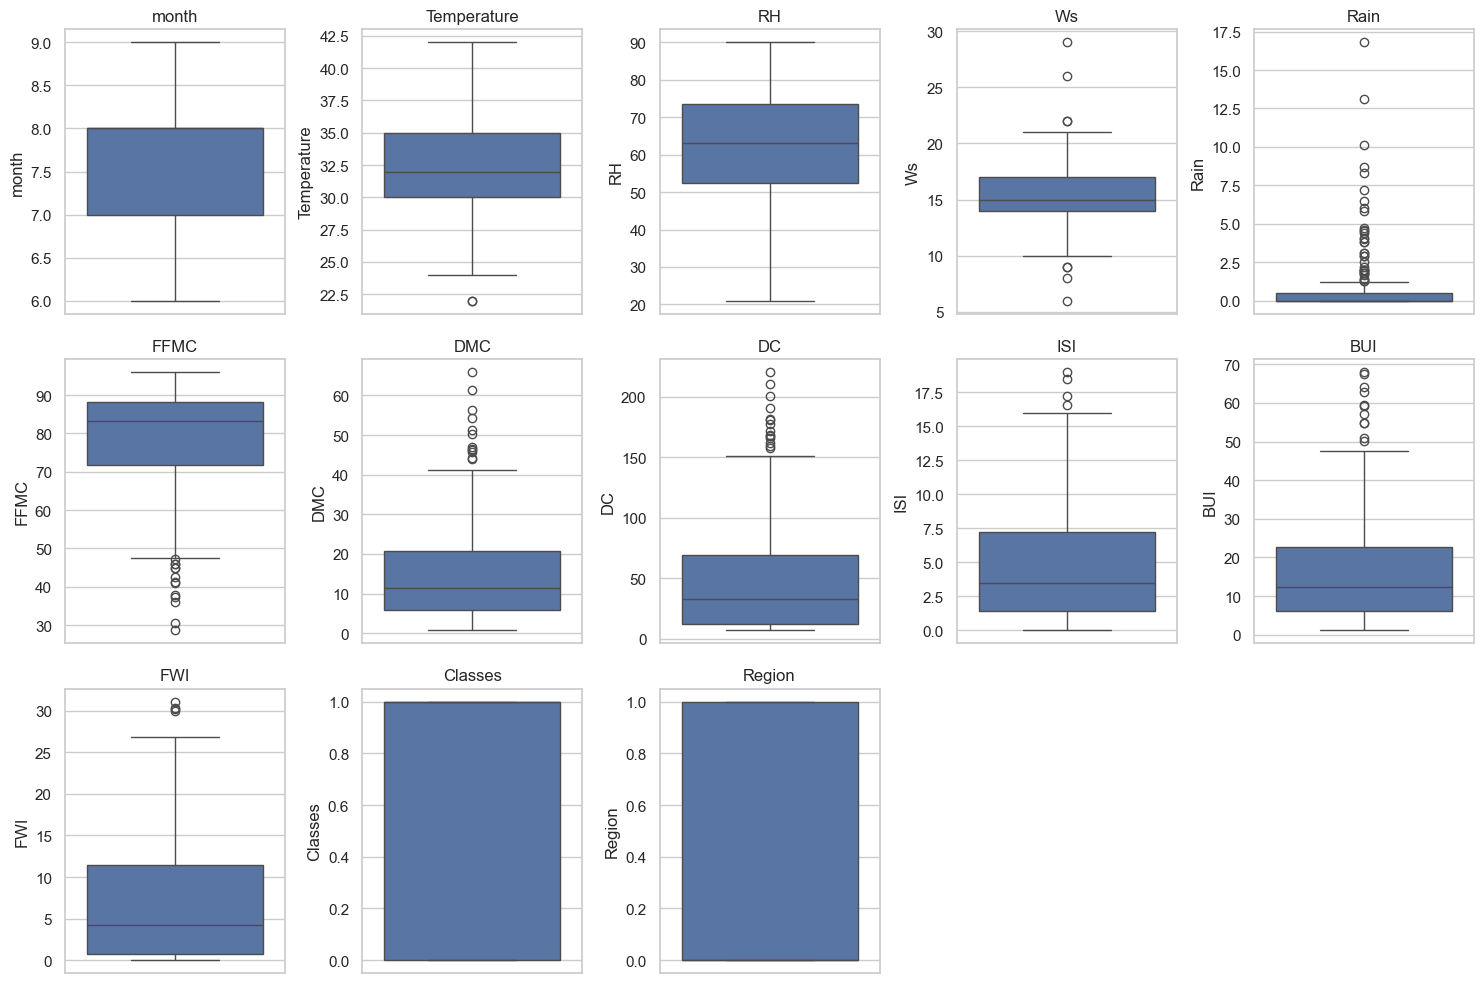

In [908]:
sns.set(style="whitegrid")

# Create a box plot for each numerical column in the dataset
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 5, i)  # Adjust the layout according to the number of numerical columns
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

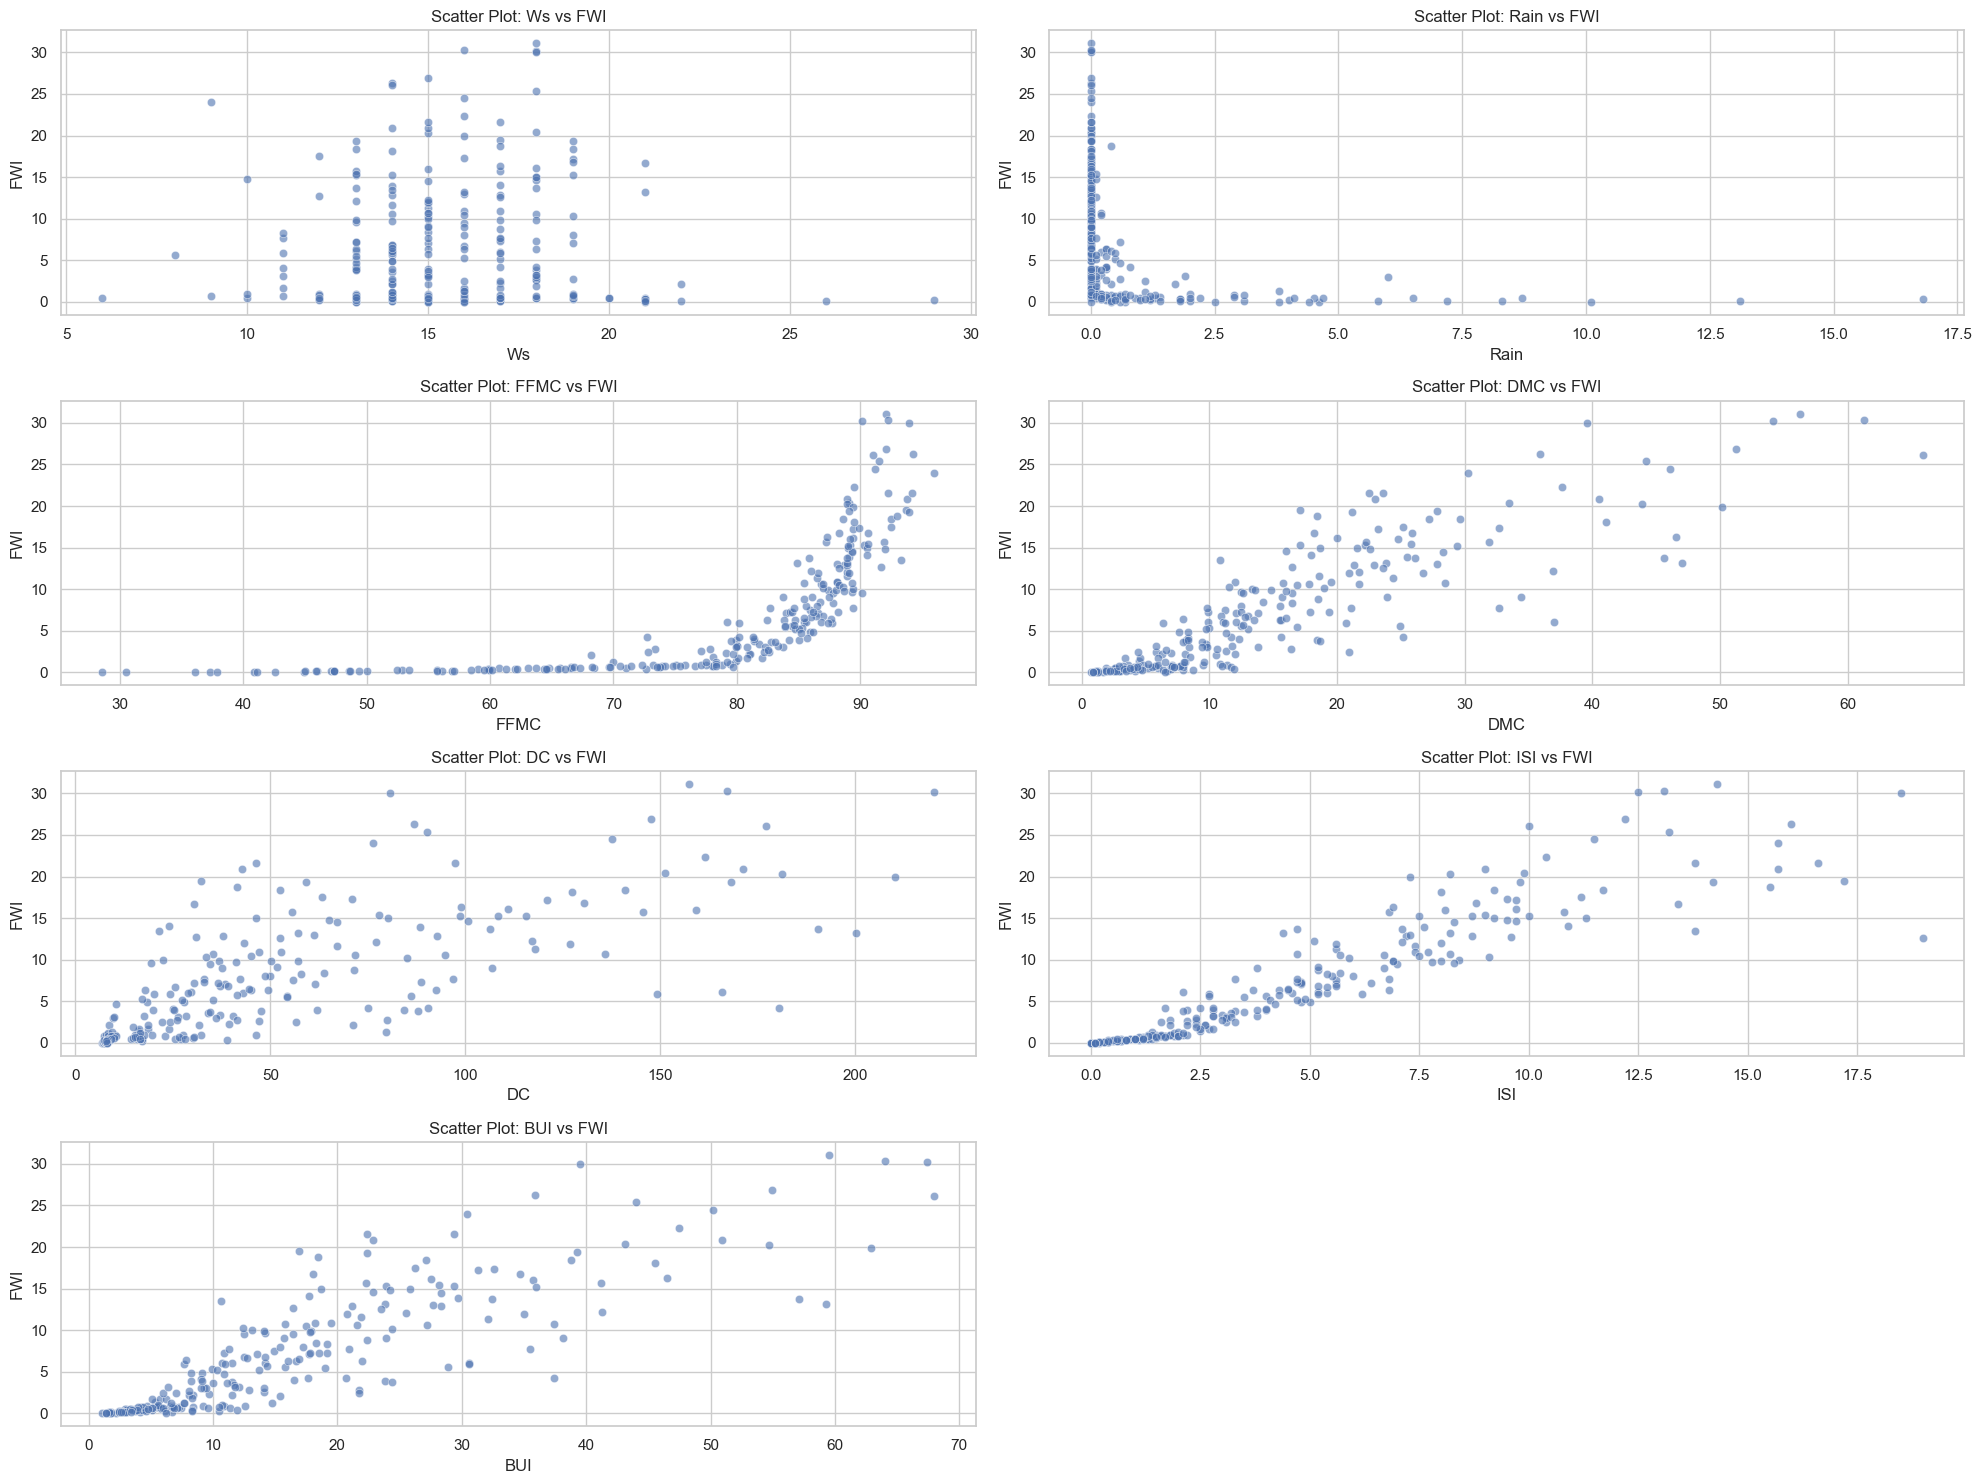

In [909]:
# List of features to plot against FWI
features = ['Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']

# Set up the matplotlib figure
plt.figure(figsize=(20, 15))

# Create scatter plots for each feature against FWI
for i, feature in enumerate(features):
    plt.subplot(4, 2, i + 1)
    sns.scatterplot(data=df, x=feature, y='FWI', alpha=0.6)
    plt.title(f'Scatter Plot: {feature} vs FWI')
    plt.xlabel(feature)
    plt.ylabel('FWI')

plt.tight_layout()
plt.show()

### CORRELATION

In [910]:
df.corr()

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
month,1.000000,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,0.024004,0.001857
Temperature,-0.056781,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.041252,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.039880,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,0.034822,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.017030,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.067943,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.126511,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.065608,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.085073,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408


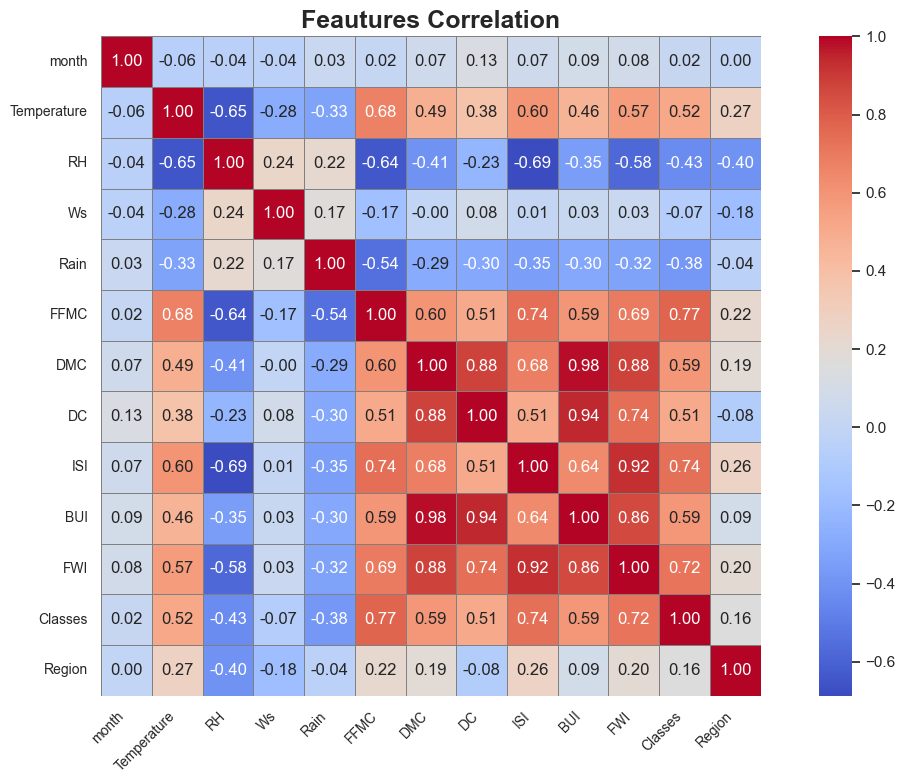

In [911]:
# Calculate the correlation matrix
df_correlation = df.corr()

# Set the figure size
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed

# Create the heatmap
sns.heatmap(df_correlation, annot=True, fmt=".2f", cmap='coolwarm', 
            cbar=True, square=True, linewidths=.5, linecolor='gray')

# Adjust the annotation font size and rotation
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=10)  # Keep y-axis labels horizontal

# Show the heatmap
plt.title('Feautures Correlation', weight='bold', fontsize=18, )
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

##### ANALYSIS:
After analyzing carefully to remove the outliers, DC is less directly influential compared to ISI or FFMC, RH has a negative correlation with FWI, high or low outliers in RH may distort the model, Rain has a negative correlation with FWI, so extreme rain events could interfere with the model's ability to predict fire conditions, Wind speed has a very weak correlation with FWI. These outliers are unlikely to contribute much to prediction and might reduce model performance.

In [912]:
# Remove outliers based on a defined threshold (example: using IQR method)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for specified columns
for column in ['RH', 'Ws', 'Rain', 'DC']:
 df = remove_outliers_iqr(df, column)

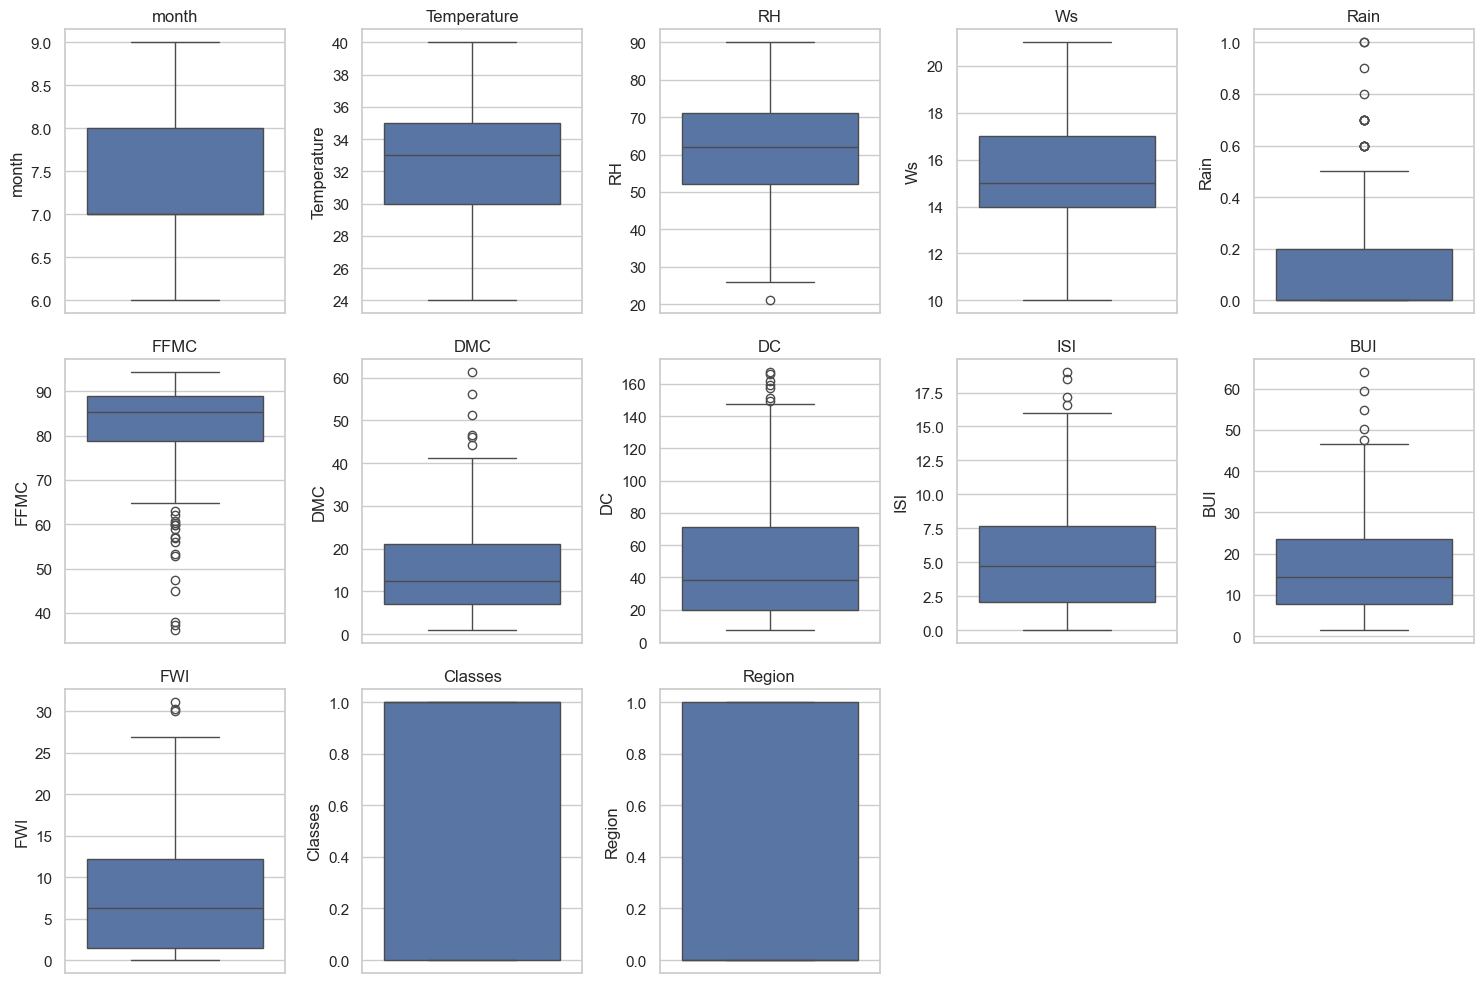

In [913]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a box plot for each numerical column in the dataset after removing outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 5, i)  # Adjust the layout according to the number of numerical columns
    sns.boxplot(y=df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

<center><h3 style="color:Red;">VISUALIZATION</h3></center>

### Visualization-1:
Visualizes the distribution of all numerical features in the dataset through histograms,helping to understand their underlying patterns.

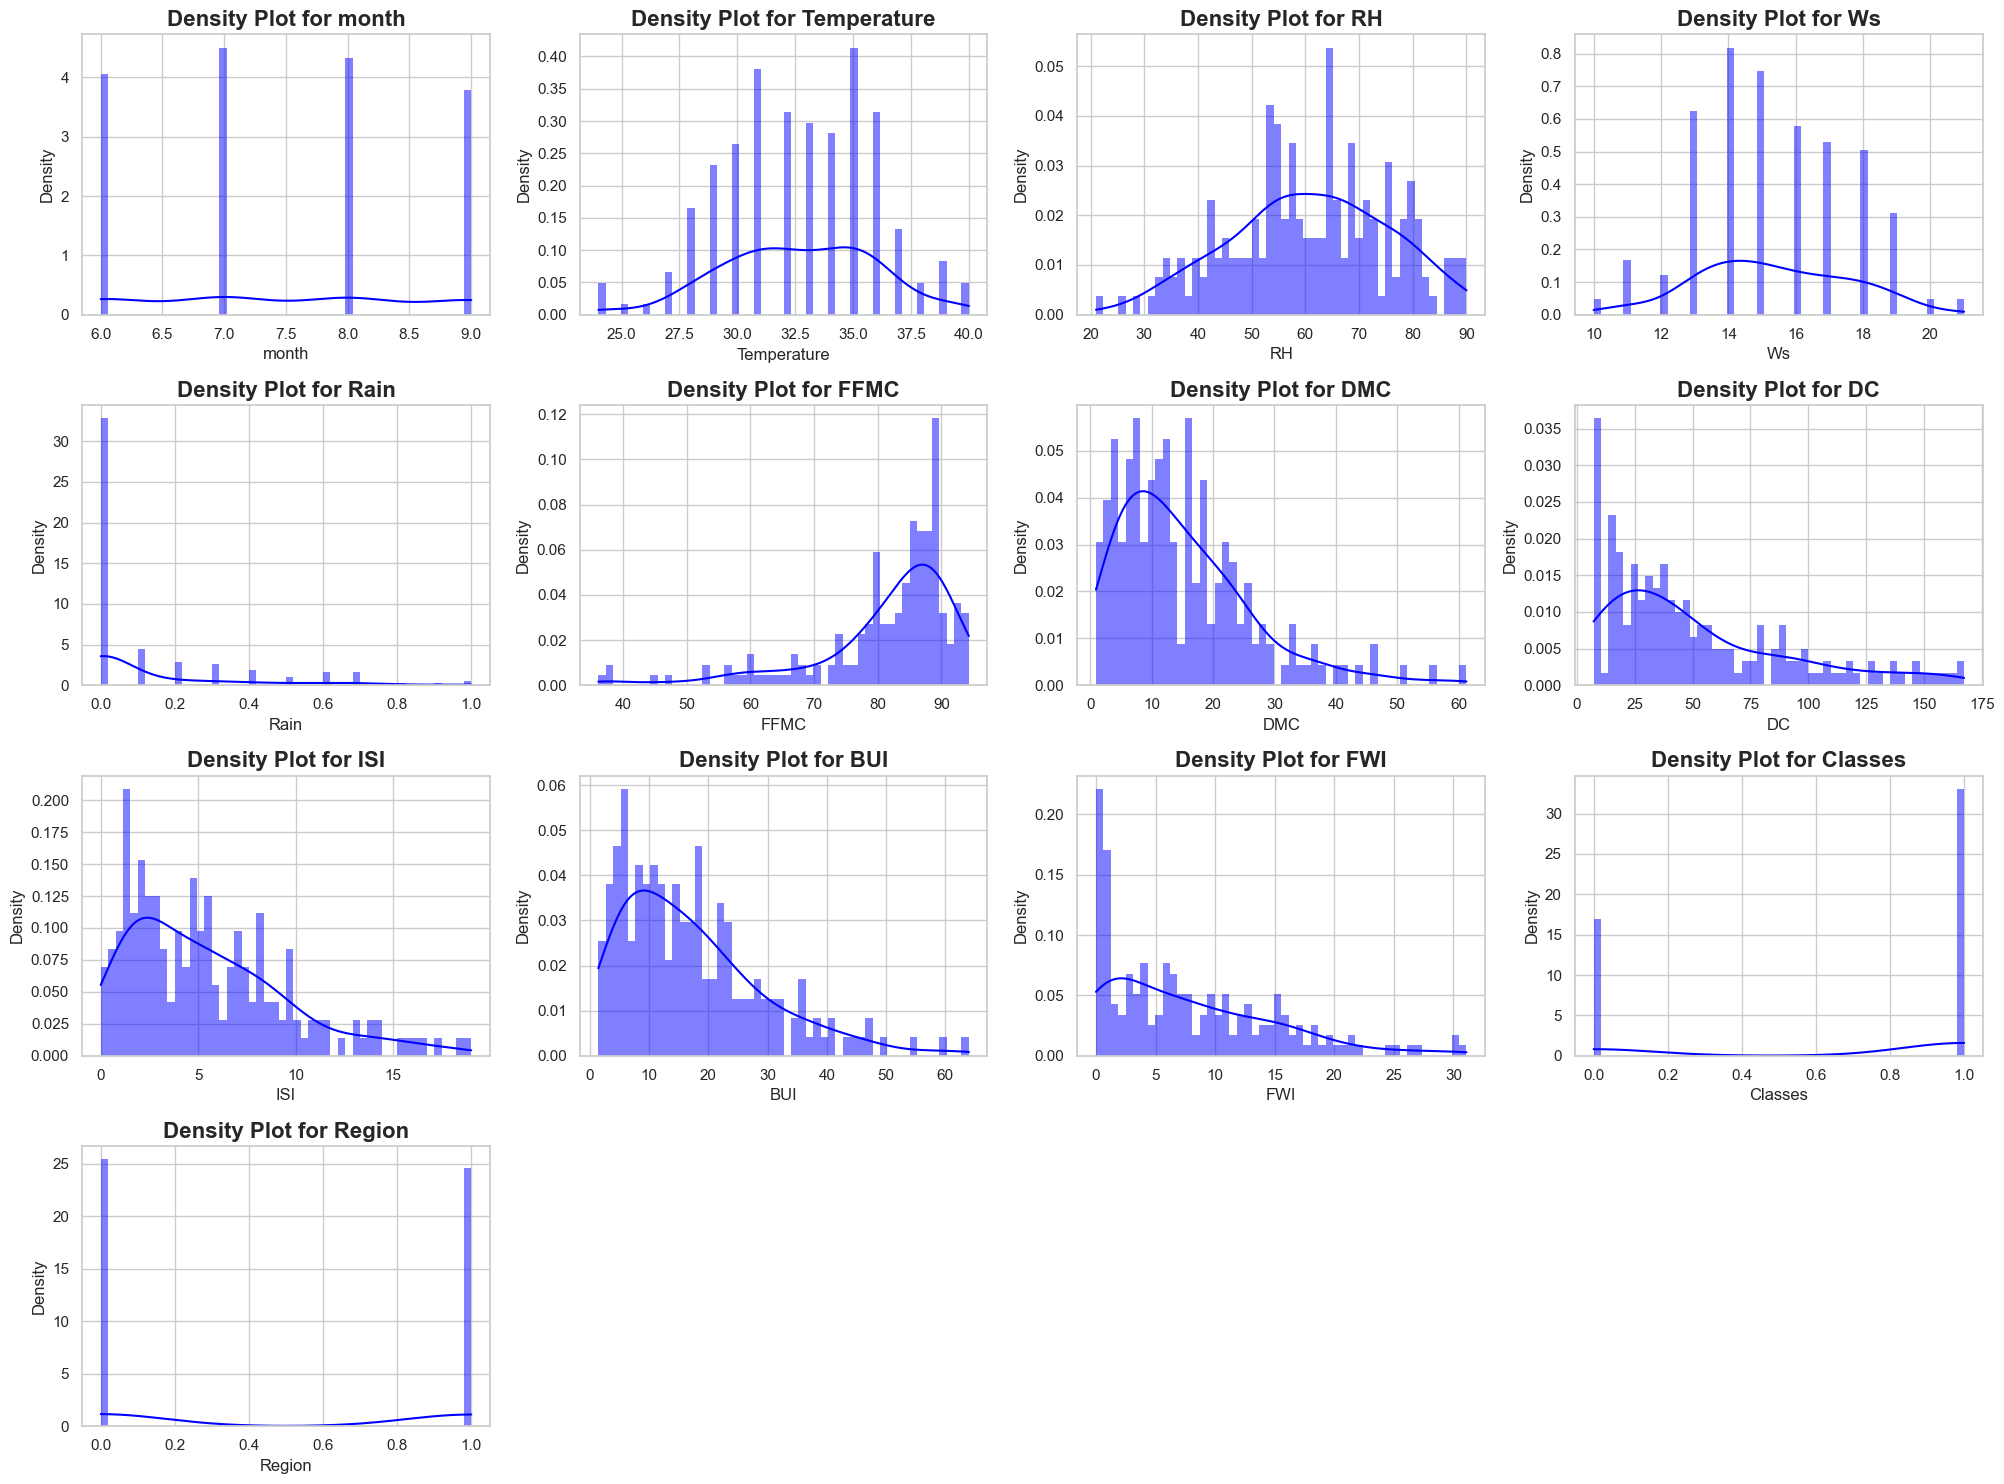

In [914]:
# visualizes the distribution of all numerical features in the dataset through histograms, helping to understand their underlying patterns.
sns.set(style="whitegrid")

#creating a figure with subplots for each feature
plt.figure(figsize=(20, 15))

#iterating over each column in the DataFrame and plot the histogram and density plot
for i, column in enumerate(df.columns):
    plt.subplot(4, 4, i + 1)  # Adjust grid size as needed
    sns.histplot(df[column], bins=50, kde=True, color='blue', stat='density', linewidth=0)
    plt.title(f'Density Plot for {column}', weight='bold', fontsize = 16)
    plt.xlabel(column)
    plt.ylabel('Density')
    
plt.tight_layout()
plt.show()

### Visualization-2:
The proportion of fire incidents versus non-fire incidents.

In [915]:
# Calculate percentage for each class
percentage = df['Classes'].value_counts(normalize=True) * 100

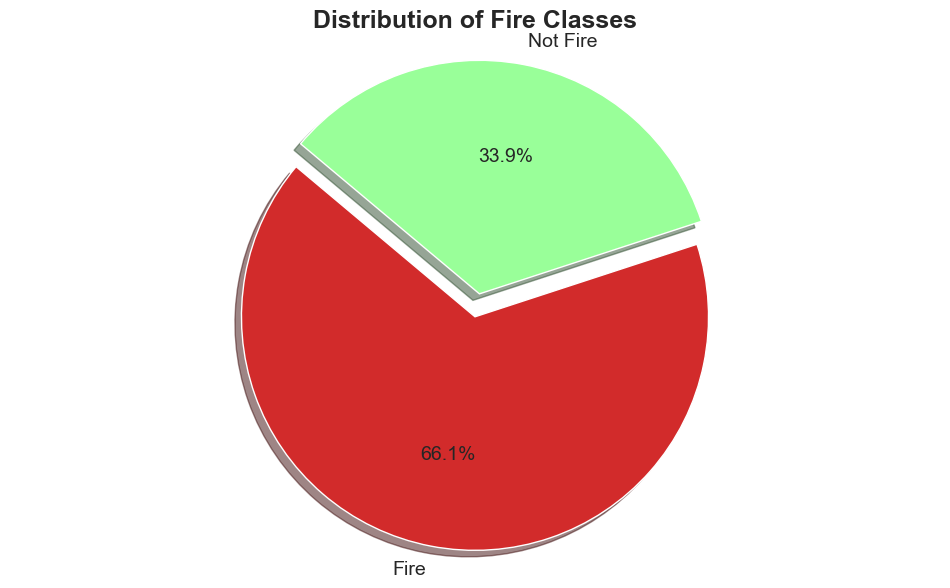

In [916]:
# Class labels
labels = ["Fire", "Not Fire"]
colors = ['#D22B2B', '#99FF99']  
explode = (0.1, 0)  # Explode the 'Fire' slice

# Create the pie chart
plt.figure(figsize=(12, 7))
plt.pie(
    percentage,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    startangle=140,
    explode=explode,
    shadow=True,
    textprops={'fontsize': 14}
)

plt.title("Distribution of Fire Classes", weight='bold', fontsize=18)
plt.axis('equal')
plt.show()

### Visualization-3:
The count plot displays the monthly distribution of fire occurrences, with "Fire" (red) and "Not Fire" (green) categorized across June to September for both regions, highlighting fire incidents during these months.

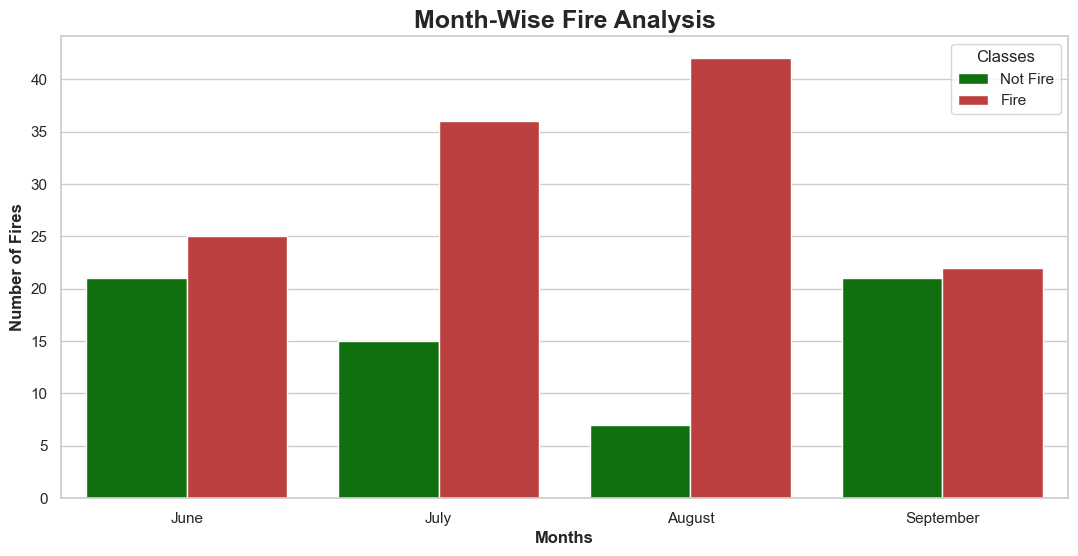

In [917]:
# Monthly Fire Analysis
plt.subplots(figsize=(13, 6))
sns.set_style('whitegrid')

# Replacing month numbers with names
df['month'] = df['month'].replace({6: 'June', 7: 'July', 8: 'August', 9: 'September'})

# Countplot for both the regions 
sns.countplot(x='month', hue='Classes', data=df, palette={0: 'green', 1: '#D22B2B'})
plt.ylabel('Number of Fires', weight='bold')
plt.xlabel('Months', weight='bold')
plt.title("Month-Wise Fire Analysis", weight='bold', fontsize=18)

plt.legend(title='Classes', labels=["Not Fire", "Fire"])
plt.show()

In [918]:
# Mapping month names back to numbers
month_numeric_mapping = {'June': 6, 'July': 7, 'August': 8, 'September': 9}

# Applying the mapping to the 'month' column
df['month'] = df['month'].map(month_numeric_mapping)

# Display the first 5 rows to verify the change
df.head(5)

,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,6,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
4,6,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,6,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,6,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0


<center><h3 style="color:Red;">MODEL BUILDING</h3></center>

In [919]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, classification_report

import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

# Feature selection and target variables
X = df[['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']]

# Target variables for multi-output (FWI for regression, Classes for classification)
y_fwi = df['FWI']      # FWI for regression
y_class = df['Classes'] # Fire/No Fire classification (0 or 1)

# Split the data into training and testing sets for regression (FWI)
X_train_fwi, X_test_fwi, y_train_fwi, y_test_fwi = train_test_split(X, y_fwi, test_size=0.2, random_state=42)

# Split the data into training and testing sets for classification (Classes)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X, y_class, test_size=0.2, random_state=42)


#### Linear Regression Model

In [920]:
# Fit the Linear Regression model
linear_model_fwi = LinearRegression()
linear_model_fwi.fit(X_train, y_train_fwi)

# Predictions and evaluation for FWI
y_pred_fwi = linear_model_fwi.predict(X_test)

# Regression metrics (FWI)
r2_fwi = r2_score(y_test_fwi, y_pred_fwi)
mae_fwi = mean_absolute_error(y_test_fwi, y_pred_fwi)
mse_fwi = mean_squared_error(y_test_fwi, y_pred_fwi)
rmse_fwi = np.sqrt(mse_fwi)

# Print the regression results for FWI
print(f"Linear Regression R² score (FWI): {r2_fwi}")
print(f"Linear Regression MAE (FWI): {mae_fwi}")
print(f"Linear Regression MSE (FWI): {mse_fwi}")
print(f"Linear Regression RMSE (FWI): {rmse_fwi}")

Linear Regression R² score (FWI): 0.9864694555859211
Linear Regression MAE (FWI): 0.6207505110124316
Linear Regression MSE (FWI): 0.7669236260316985
Linear Regression RMSE (FWI): 0.8757417576156218


#### Polynomial Regression Model

In [921]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

poly_model_fwi = LinearRegression()
poly_model_fwi.fit(X_train_poly, y_train_fwi)

# Predictions and evaluation for Polynomial Regression
y_pred_poly = poly_model_fwi.predict(X_test_poly)

# Regression metrics for Polynomial Regression
r2_poly = r2_score(y_test_fwi, y_pred_poly)
mae_poly = mean_absolute_error(y_test_fwi, y_pred_poly)
mse_poly = mean_squared_error(y_test_fwi, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

# Print Polynomial Regression results
print(f"Polynomial Regression R² score (FWI): {r2_poly}")
print(f"Polynomial Regression MAE (FWI): {mae_poly}")
print(f"Polynomial Regression MSE (FWI): {mse_poly}")
print(f"Polynomial Regression RMSE (FWI): {rmse_poly}")

Polynomial Regression R² score (FWI): 0.995405892872634
Polynomial Regression MAE (FWI): 0.27226863032893134
Polynomial Regression MSE (FWI): 0.26039819157841476
Polynomial Regression RMSE (FWI): 0.510292260943094


In [922]:
#Logistic Regression for Fire/No Fire Classification
classifier_class = LogisticRegression()
classifier_class.fit(X_train_class, y_train_class)

# Predictions and evaluation for Classes
y_pred_class = classifier_class.predict(X_test_class)

# Classification metrics (Classes)
accuracy_class = accuracy_score(y_test_class, y_pred_class)
classification_rep = classification_report(y_test_class, y_pred_class)

# Print the classification results for Classes
print(f"Logistic Regression Accuracy (Classes): {accuracy_class}")
print("Classification Report (Classes):")
print(classification_rep)

Logistic Regression Accuracy (Classes): 0.9473684210526315
Classification Report (Classes):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.96      0.96      0.96        24

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38



#### Regularization Models

In [923]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train_fwi)

y_pred_lasso = lasso_model.predict(X_test)

# Metrics for Lasso Regression
r2_lasso = r2_score(y_test_fwi, y_pred_lasso)
print(f"Lasso Regression R² score (FWI): {r2_lasso}")

Lasso Regression R² score (FWI): 0.983116749483524


In [924]:
# Ridge Regression 
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train_fwi)

y_pred_ridge = ridge_model.predict(X_test)

# Metrics for Ridge Regression
r2_ridge = r2_score(y_test_fwi, y_pred_ridge)
print(f"Ridge Regression R² score (FWI): {r2_ridge}")

Ridge Regression R² score (FWI): 0.9864965365356876


<center><h3 style="color:Red;">MODEL EVALUATION</h3></center>

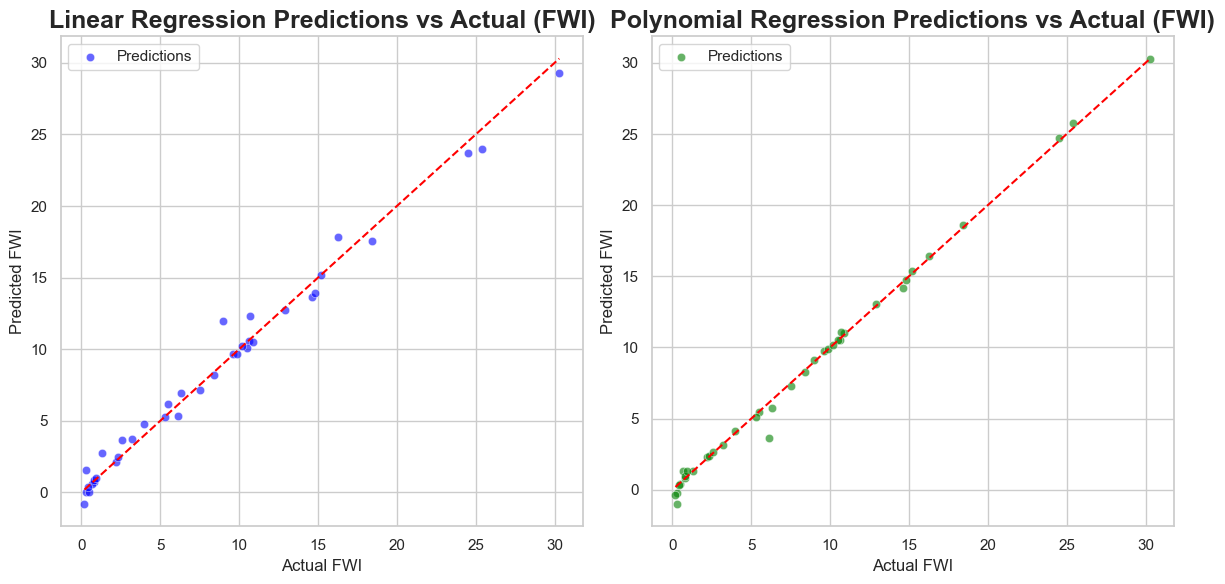

In [925]:
plt.figure(figsize=(12, 6))

# Linear Regression Predictions
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test_fwi, y=y_pred_fwi, color='blue', label='Predictions', alpha=0.6)
plt.plot([y_test_fwi.min(), y_test_fwi.max()], [y_test_fwi.min(), y_test_fwi.max()], '--', color='red')
plt.title('Linear Regression Predictions vs Actual (FWI)',  weight='bold', fontsize=18)
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.legend()
plt.grid(True)

# Polynomial Regression Predictions
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_fwi, y=y_pred_poly, color='green', label='Predictions', alpha=0.6)
plt.plot([y_test_fwi.min(), y_test_fwi.max()], [y_test_fwi.min(), y_test_fwi.max()], '--', color='red')
plt.title('Polynomial Regression Predictions vs Actual (FWI)',  weight='bold', fontsize=18)
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

#### ANALYSIS:
#### Linear Regression: 
The model shows a general linear trend but struggles with variance, particularly at higher FWI values, indicating a moderate fit.
#### Polynomial Regression: 
Predictions closely match actual values with minimal deviations, effectively capturing non-linear relationships and providing a more accurate fit than the linear model.
#### Conclusion: 
Polynomial Regression outperforms Linear Regression in predicting FWI, especially for complex, non-linear data patterns.

#### CROSS-VALIDATION

In [926]:
# Fit the Polynomial Regression model
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_fwi)
X_test_poly = poly.transform(X_test_fwi)

poly_model_fwi = LinearRegression()
poly_model_fwi.fit(X_train_poly, y_train_fwi)

# Predictions and evaluation for Polynomial Regression
y_pred_poly = poly_model_fwi.predict(X_test_poly)

# Regression metrics for Polynomial Regression
r2_poly = r2_score(y_test_fwi, y_pred_poly)
mae_poly = mean_absolute_error(y_test_fwi, y_pred_poly)
mse_poly = mean_squared_error(y_test_fwi, y_pred_poly)
rmse_poly = np.sqrt(mse_poly)

# Print Polynomial Regression results
print(f"Polynomial Regression R² score (FWI): {r2_poly}")
print(f"Polynomial Regression MAE (FWI): {mae_poly}")
print(f"Polynomial Regression MSE (FWI): {mse_poly}")
print(f"Polynomial Regression RMSE (FWI): {rmse_poly}")

# Perform Cross-Validation for Polynomial Regression
poly_cv_scores = cross_val_score(poly_model_fwi, X_train_poly, y_train_fwi, cv=5, scoring='r2')
print(f"Polynomial Regression Cross-Validation R² scores: {poly_cv_scores}")
print(f"Mean R² score from Cross-Validation: {np.mean(poly_cv_scores)}")

Polynomial Regression R² score (FWI): 0.995405892872634
Polynomial Regression MAE (FWI): 0.27226863032893134
Polynomial Regression MSE (FWI): 0.26039819157841476
Polynomial Regression RMSE (FWI): 0.510292260943094
Polynomial Regression Cross-Validation R² scores: [0.92395556 0.98514701 0.90997948 0.99239464 0.99819558]
Mean R² score from Cross-Validation: 0.9619344527514094


##### ANALYSIS: 
Overall, these results demonstrate that the Polynomial Regression model is highly effective for predicting FWI while still being robust enough for practical use.

In [927]:
# Logistic Regression for Fire/No Fire Classification 
classifier_class = LogisticRegression()
classifier_class.fit(X_train_class, y_train_class)

# Predictions and evaluation for Classes
y_pred_class = classifier_class.predict(X_test_class)

# Classification metrics (Classes)
accuracy_class = accuracy_score(y_test_class, y_pred_class)
classification_rep = classification_report(y_test_class, y_pred_class)

# Print the classification results for Classes
print(f"Logistic Regression Accuracy (Classes): {accuracy_class}")
print("Classification Report (Classes):")
print(classification_rep)

# Perform Cross-Validation for Logistic Regression
logistic_cv_scores = cross_val_score(classifier_class, X_train_class, y_train_class, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Accuracy scores: {logistic_cv_scores}")
print(f"Mean Accuracy score from Cross-Validation: {np.mean(logistic_cv_scores)}")

Logistic Regression Accuracy (Classes): 0.9473684210526315
Classification Report (Classes):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.96      0.96      0.96        24

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

Logistic Regression Cross-Validation Accuracy scores: [0.87096774 0.96666667 0.9        0.96666667 1.        ]
Mean Accuracy score from Cross-Validation: 0.9408602150537636


##### Analysis:
Overall, the Logistic Regression model demonstrates strong predictive capabilities for classifying fire occurrences while remaining stable across different datasets. 

The mean accuracy score of 0.9409 after cross-validation indicates that the model is expected to generalize well to unseen data, although there is a slight decrease compared to the initial accuracy, which is common when evaluating model performance on different subsets.

#### HYPERPARAMETER TUNING

In [928]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define a pipeline with polynomial features and linear regression
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('model', LinearRegression())
])

# Define the hyperparameter grid
param_grid = {
    'poly__degree': [1, 2, 3, 4, 5]  # Different polynomial degrees to test
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train_fwi)

# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Polynomial Degree: {best_params['poly__degree']}")
print(f"Best Cross-Validated R² Score: {best_score}")

Best Polynomial Degree: 2
Best Cross-Validated R² Score: 0.9619344527514094


In [929]:
# Fit the final polynomial regression model using the best degree
final_poly = PolynomialFeatures(degree=2)
X_train_final_poly = final_poly.fit_transform(X_train)
X_test_final_poly = final_poly.transform(X_test)

final_poly_model = LinearRegression()
final_poly_model.fit(X_train_final_poly, y_train_fwi)

# Predictions
y_pred_final_poly = final_poly_model.predict(X_test_final_poly)

# Evaluate the final model
r2_final_poly = r2_score(y_test_fwi, y_pred_final_poly)
mae_final_poly = mean_absolute_error(y_test_fwi, y_pred_final_poly)
mse_final_poly = mean_squared_error(y_test_fwi, y_pred_final_poly)
rmse_final_poly = np.sqrt(mse_final_poly)

# Print final evaluation results
print(f"Final Polynomial Regression R² score (FWI): {r2_final_poly}")
print(f"Final Polynomial Regression MAE (FWI): {mae_final_poly}")
print(f"Final Polynomial Regression MSE (FWI): {mse_final_poly}")
print(f"Final Polynomial Regression RMSE (FWI): {rmse_final_poly}")

Final Polynomial Regression R² score (FWI): 0.995405892872634
Final Polynomial Regression MAE (FWI): 0.27226863032893134
Final Polynomial Regression MSE (FWI): 0.26039819157841476
Final Polynomial Regression RMSE (FWI): 0.510292260943094


##### ANALYSIS: 
Performance metrics for the polynomial regression model remained the same before and after hyperparameter tuning because model consistently 
produces similar metrics across different splits of the data, it indicates that the model is stable and performing well.

<center><h3 style="color:Red;">PICKLE FILE CREATION</h3></center>

In [930]:
import pickle

# Save the Polynomial Regression model to a pickle file
with open('poly_model_fwi.pkl', 'wb') as file:
    pickle.dump(poly_model_fwi, file)

# Save the Logistic Regression classifier to a pickle file
with open('classifier_class.pkl', 'wb') as file:
    pickle.dump(classifier_class, file)

# Save the best polynomial model from Grid Search to a pickle file
with open('best_poly_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

<center><h3 style="color:Red;">TESTING</h3></center>

In [931]:
# Load the Polynomial Regression model
with open('poly_model_fwi.pkl', 'rb') as file:
    loaded_poly_model = pickle.load(file)

# Load the Logistic Regression model
with open('classifier_class.pkl', 'rb') as file:
    loaded_classifier_model = pickle.load(file)

# Load the best polynomial model from Grid Search
with open('best_poly_model.pkl', 'rb') as file:
    loaded_best_poly_model = pickle.load(file)

# Example unseen data
unseen_data = pd.DataFrame({
    'Temperature': [20, 25],
    'RH': [45, 55],
    'Ws': [5, 7],
    'Rain': [0, 0.2],
    'FFMC': [85, 89],
    'DMC': [6, 15],
    'DC': [94, 105],
    'ISI': [6, 7],
    'BUI': [20, 25]
})

# Transform the unseen data for Polynomial Regression
unseen_data_poly = poly.transform(unseen_data)

# Make predictions with the Polynomial Regression model
pred_fwi = loaded_poly_model.predict(unseen_data_poly)
print(f"Predicted FWI values for unseen data: {pred_fwi}")

# Make predictions with the Logistic Regression model (fire/no fire classification)
pred_class = loaded_classifier_model.predict(unseen_data)
print(f"Predicted Fire/No Fire classification for unseen data: {pred_class}")

Predicted FWI values for unseen data: [4.68287134 8.9527905 ]
Predicted Fire/No Fire classification for unseen data: [1 1]


<center><h3 style="color:Red;">MODEL TESTING ANALYSIS</h3></center>
<h4> FWI (Fire Weather Index) Predictions: </h4>
The first data point has an FWI value of 4.68, which represents the fire weather risk for that specific input data.
The second data point has an FWI value of 8.95, which indicates a higher fire weather risk compared to the first point.
<h4> Fire/No Fire Classification Predictions: </h4>
Both data points are classified as 1, meaning they are predicted to be in a "fire" condition (i.e., fire risk exists).